In [1]:
import os
import cv2
import numpy as np
from matplotlib import pylab as plt

In [2]:
img_ids = ['9768219_11', '9625433_14', '9619698_08', '9625433_18', '9626197_10']
oriImgPaths = sorted([f"/projectnb/aicv/Shihua_Qin/BMLSeg2D/dataset/BMLClosing/imagesTs/{id}.bmp" for id in img_ids])
gtPaths = sorted([f"/projectnb/aicv/Shihua_Qin/BMLSeg2D/dataset/BMLClosing/labelsTs/{id}_00.bmp" for id in img_ids])

unetch1Paths = sorted([f"/projectnb/aicv/Shihua_Qin/BMLSeg2D/predict/Unet_diceCELoss_BMLonly_Dice/{id}_00_pred.bmp" for id in img_ids])
unetch2Paths = sorted([f"/projectnb/aicv/Shihua_Qin/BMLSeg2D/predict/Unet_diceCELoss_chan2_Dice/{id}_00_pred.bmp" for id in img_ids])

attench1Paths = sorted([f"/projectnb/aicv/Shihua_Qin/BMLSeg2D/predict/AttentionUnet_diceCELoss_BMLonly_Dice/{id}_00_pred.bmp" for id in img_ids])
attench2Paths = sorted([f"/projectnb/aicv/Shihua_Qin/BMLSeg2D/predict/AttentionUnet_diceCELoss_Dice/{id}_00_pred.bmp" for id in img_ids])

SwinUnetch1Paths = sorted([f"/projectnb/aicv/Shihua_Qin/BMLSeg2D/predict/SwinUnetr_diceCELoss_BMLonly_Dice/{id}_00_pred.bmp" for id in img_ids])
SwinUnetch2Paths = sorted([f"/projectnb/aicv/Shihua_Qin/BMLSeg2D/predict/SwinUnetr_diceCELoss_chan2_Dice/{id}_00_pred.bmp" for id in img_ids])

UnetPlusPlusCh1Paths = sorted([f"/projectnb/aicv/Shihua_Qin/BMLSeg2D/predict/UnetPlusPlus_diceCELoss_BMLonly_Dice/{id}_00_pred.bmp" for id in img_ids])
UnetPlusPlusCh2Paths = sorted([f"/projectnb/aicv/Shihua_Qin/BMLSeg2D/predict/UnetPlusPlus_diceCELoss_Dice/{id}_00_pred.bmp" for id in img_ids])

# row_names = ['original', "Ground Truth", "Unet C1", "Unet C2", "SwinUnetR C1", "SwinUnetR C2", "Unet++ C1", "Unet++ C2", "attentionUnet C2"]
# col_names = ['Case 1', 'Case 2', 'Case 3', 'Case 4', 'Case 5']
row_names = ['Case 1', 'Case 2', 'Case 3', 'Case 4', 'Case 5']
col_names = ["Ground Truth", "UNet", "AttentionUNet", "SwinUNETR", "UNet++"]
# /projectnb/aicv/Shihua_Qin/BMLSeg2D/dataset/BMLClosing/labelsTs/9625433_14_00.bmp
# /projectnb/aicv/Shihua_Qin/BMLSeg2D/dataset/BMLClosing/labelsTs/9768500_09_00.bmp
# /projectnb/aicv/Shihua_Qin/BMLSeg2D/dataset/BMLClosing/labelsTs/9768219_11_00.bmp

In [18]:
gtPaths

['/projectnb/aicv/Shihua_Qin/BMLSeg2D/dataset/BMLClosing/labelsTs/9619698_08_00.bmp',
 '/projectnb/aicv/Shihua_Qin/BMLSeg2D/dataset/BMLClosing/labelsTs/9625433_14_00.bmp',
 '/projectnb/aicv/Shihua_Qin/BMLSeg2D/dataset/BMLClosing/labelsTs/9625433_18_00.bmp',
 '/projectnb/aicv/Shihua_Qin/BMLSeg2D/dataset/BMLClosing/labelsTs/9626197_10_00.bmp',
 '/projectnb/aicv/Shihua_Qin/BMLSeg2D/dataset/BMLClosing/labelsTs/9768219_11_00.bmp']

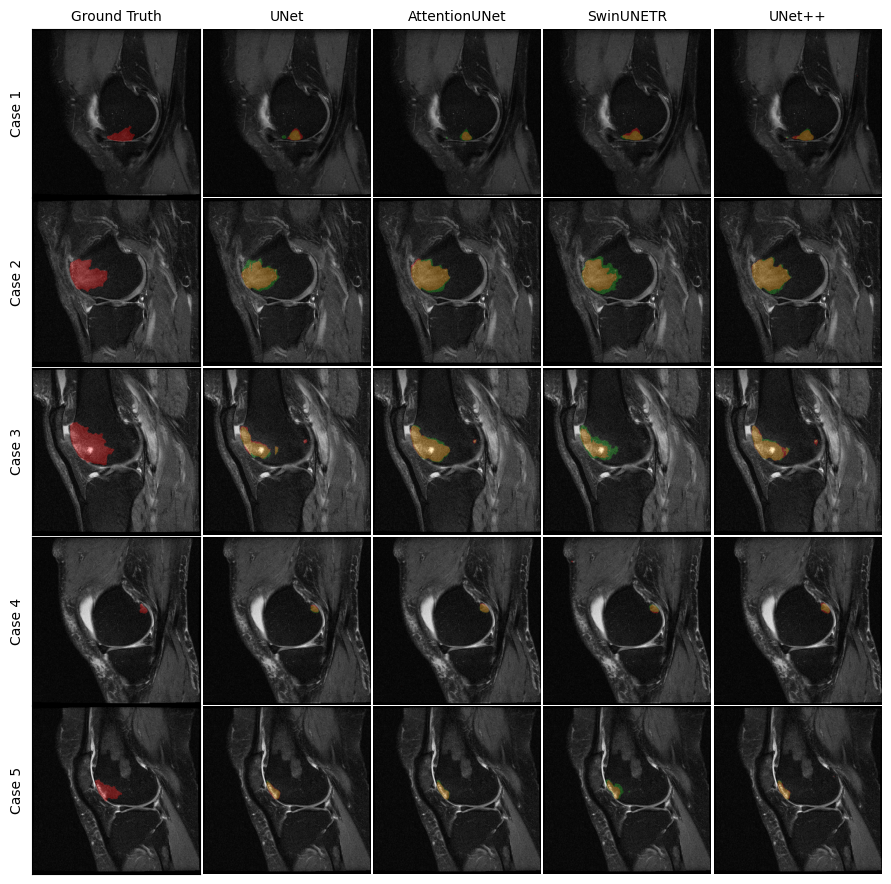

In [3]:
fig, axs = plt.subplots(5, 5, figsize=(10, 13))
alpha = 1
beta = 0.4
gamma = 0


# ground truth
for i, (imgPath, maskPath) in enumerate(zip(oriImgPaths, gtPaths)):
    img = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)
    img = img.astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    mask = cv2.imread(maskPath, cv2.IMREAD_GRAYSCALE)
    mask = (mask / 255).astype(np.uint8)
    color = np.array([200, 0, 0], dtype=np.uint8)
    mask = mask.astype(np.bool_)
    color_mask = np.zeros(img.shape, dtype=np.uint8)
    color_mask[mask] = color

    mask_img = cv2.addWeighted(img, alpha, color_mask, beta, gamma)
    axs[i, 0].imshow(mask_img)
    axs[i, 0].axis('off')

# Unet
for i, (imgPath, ch1path, ch2path) in enumerate(zip(oriImgPaths, unetch1Paths, unetch2Paths)):
    img = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)
    img = img.astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    pred_ch1 = cv2.imread(ch1path, cv2.IMREAD_GRAYSCALE)
    pred_ch1 = (pred_ch1 / 255).astype(np.uint8)
    color_ch1 = np.array([200, 0, 0], dtype=np.uint8)
    mask_ch1 = pred_ch1.astype(np.bool_)
    color_mask_ch1 = np.zeros(img.shape, dtype=np.uint8)
    color_mask_ch1[mask_ch1] = color_ch1

    pred_ch2 = cv2.imread(ch2path, cv2.IMREAD_GRAYSCALE)
    pred_ch2 = (pred_ch2 / 255).astype(np.uint8)
    color_ch2 = np.array([0, 125,0], dtype=np.uint8)
    mask_ch2 = pred_ch2.astype(np.bool_)
    color_mask_ch2 = np.zeros(img.shape, dtype=np.uint8)
    color_mask_ch2[mask_ch2] = color_ch2

    mask_img = cv2.addWeighted(img, alpha, color_mask_ch1, beta, gamma)
    mask_img = cv2.addWeighted(mask_img, alpha, color_mask_ch2, beta, gamma)
    axs[i, 1].imshow(mask_img)
    axs[i, 1].axis('off')

# AttentionUnet
for i, (imgPath, ch1path, ch2path) in enumerate(zip(oriImgPaths, attench1Paths, attench2Paths)):
    img = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)
    img = img.astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    pred_ch1 = cv2.imread(ch1path, cv2.IMREAD_GRAYSCALE)
    pred_ch1 = (pred_ch1 / 255).astype(np.uint8)
    color_ch1 = np.array([200, 0, 0], dtype=np.uint8)
    mask_ch1 = pred_ch1.astype(np.bool_)
    color_mask_ch1 = np.zeros(img.shape, dtype=np.uint8)
    color_mask_ch1[mask_ch1] = color_ch1

    pred_ch2 = cv2.imread(ch2path, cv2.IMREAD_GRAYSCALE)
    pred_ch2 = (pred_ch2 / 255).astype(np.uint8)
    color_ch2 = np.array([0, 125,0], dtype=np.uint8)
    mask_ch2 = pred_ch2.astype(np.bool_)
    color_mask_ch2 = np.zeros(img.shape, dtype=np.uint8)
    color_mask_ch2[mask_ch2] = color_ch2

    mask_img = cv2.addWeighted(img, alpha, color_mask_ch1, beta, gamma)
    mask_img = cv2.addWeighted(mask_img, alpha, color_mask_ch2, beta, gamma)
    axs[i, 2].imshow(mask_img)
    axs[i, 2].axis('off')

# SwimUnetr
for i, (imgPath, ch1path, ch2path) in enumerate(zip(oriImgPaths, SwinUnetch1Paths, SwinUnetch2Paths)):
    img = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)
    img = img.astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    pred_ch1 = cv2.imread(ch1path, cv2.IMREAD_GRAYSCALE)
    pred_ch1 = (pred_ch1 / 255).astype(np.uint8)
    color_ch1 = np.array([200, 0, 0], dtype=np.uint8)
    mask_ch1 = pred_ch1.astype(np.bool_)
    color_mask_ch1 = np.zeros(img.shape, dtype=np.uint8)
    color_mask_ch1[mask_ch1] = color_ch1

    pred_ch2 = cv2.imread(ch2path, cv2.IMREAD_GRAYSCALE)
    pred_ch2 = (pred_ch2 / 255).astype(np.uint8)
    color_ch2 = np.array([0, 125,0], dtype=np.uint8)
    mask_ch2 = pred_ch2.astype(np.bool_)
    color_mask_ch2 = np.zeros(img.shape, dtype=np.uint8)
    color_mask_ch2[mask_ch2] = color_ch2

    mask_img = cv2.addWeighted(img, alpha, color_mask_ch1, beta, gamma)
    mask_img = cv2.addWeighted(mask_img, alpha, color_mask_ch2, beta, gamma)
    axs[i, 3].imshow(mask_img)
    axs[i, 3].axis('off')

# Unet++
for i, (imgPath, ch1path, ch2path) in enumerate(zip(oriImgPaths, UnetPlusPlusCh1Paths, UnetPlusPlusCh2Paths)):
    img = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)
    img = img.astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    pred_ch1 = cv2.imread(ch1path, cv2.IMREAD_GRAYSCALE)
    pred_ch1 = (pred_ch1 / 255).astype(np.uint8)
    color_ch1 = np.array([200, 0, 0], dtype=np.uint8)
    mask_ch1 = pred_ch1.astype(np.bool_)
    color_mask_ch1 = np.zeros(img.shape, dtype=np.uint8)
    color_mask_ch1[mask_ch1] = color_ch1

    pred_ch2 = cv2.imread(ch2path, cv2.IMREAD_GRAYSCALE)
    pred_ch2 = (pred_ch2 / 255).astype(np.uint8)
    color_ch2 = np.array([0, 125,0], dtype=np.uint8)
    mask_ch2 = pred_ch2.astype(np.bool_)
    color_mask_ch2 = np.zeros(img.shape, dtype=np.uint8)
    color_mask_ch2[mask_ch2] = color_ch2

    mask_img = cv2.addWeighted(img, alpha, color_mask_ch1, beta, gamma)
    mask_img = cv2.addWeighted(mask_img, alpha, color_mask_ch2, beta, gamma)
    axs[i, 4].imshow(mask_img)
    axs[i, 4].axis('off')

for ax, col in zip(axs[0], col_names):
    ax.set_title(col, fontsize=10)

for ax, row in zip(axs[:,0], row_names):
    ax.axis('on')
    ax.set_ylabel(row, rotation=90, fontsize=10, labelpad=40)
    ax.yaxis.set_label_coords(-0.05, 0.5)
    ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=1., bottom=0.35, left=0.15, right=1.0, hspace=0.01, wspace=0.01)
plt.show()

In [25]:
image_paths = ["/projectnb/aicv/Shihua_Qin/BMLSeg2D/dataset/BMLClosing/imagesTr/9013161_25.bmp",
                "/projectnb/aicv/Shihua_Qin/BMLSeg2D/dataset/BMLClosing/imagesTr/9002116_11.bmp",
                "/projectnb/aicv/Shihua_Qin/BMLSeg2D/dataset/BMLClosing/imagesTr/9900668_12.bmp"]
label_paths = ["/projectnb/aicv/Shihua_Qin/BMLSeg2D/dataset/BMLClosing/labelsTr/9013161_25_00.bmp",
                "/projectnb/aicv/Shihua_Qin/BMLSeg2D/dataset/BMLClosing/labelsTr/9002116_11_00.bmp",
                "/projectnb/aicv/Shihua_Qin/BMLSeg2D/dataset/BMLClosing/labelsTr/9900668_12_00.bmp"]

In [12]:
import os
import cv2
import copy
import numpy as np
import matplotlib.pyplot as plt

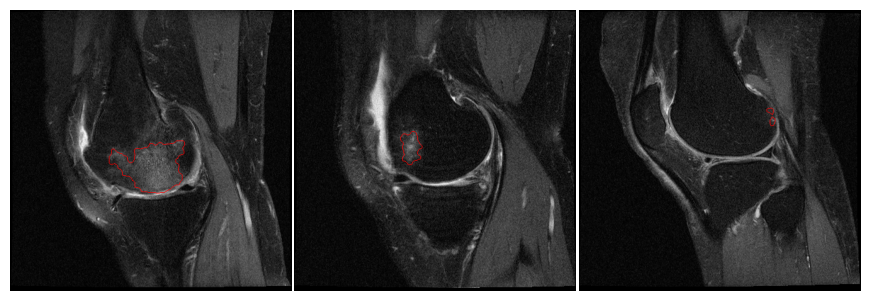

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(10, 15))

for i, (img_path, label_path) in enumerate(zip(image_paths, label_paths)):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)

    contours, _ = cv2.findContours(label, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # draw_mask = 
    # draw_mask = cv2.cvtColor(draw_mask, cv2.COLOR_GRAY2BGR)

    contour_image = copy.deepcopy(img)
    contour_image = cv2.cvtColor(contour_image, cv2.COLOR_GRAY2BGR)
    for contour in contours:
        cv2.drawContours(contour_image, contours, -1, (255, 0, 0), 1)
    
    axs[i].imshow(contour_image)
    axs[i].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=1., bottom=0.35, left=0.15, right=1.0, hspace=0.01, wspace=0.01)
plt.show()